In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Group_4_data_cleaned.csv",index_col = 0)
df.head()

height  length  area  eccen  p_black  p_and  mean_tr  blackpix  blackand  \
0     5.0       7    35  1.400    0.400  0.657     2.33        14      23.0   
1     6.0       7    42  1.167    0.429  0.881     3.60        18      37.0   
2     6.0      18   108  3.000    0.287  0.741     4.43        31      80.0   
3     5.0       7    35  1.400    0.371  0.743     4.33        13      26.0   
4     6.0       3    18  0.500    0.500  0.944     2.25         9      17.0   

   wb_trans  y  
0       6.0  1  
1       5.0  1  
2       7.0  1  
3       3.0  1  
4       4.0  1

In [3]:
df1 = df.iloc[:,:-1]
X = df1
y = df['y']

col = X.columns

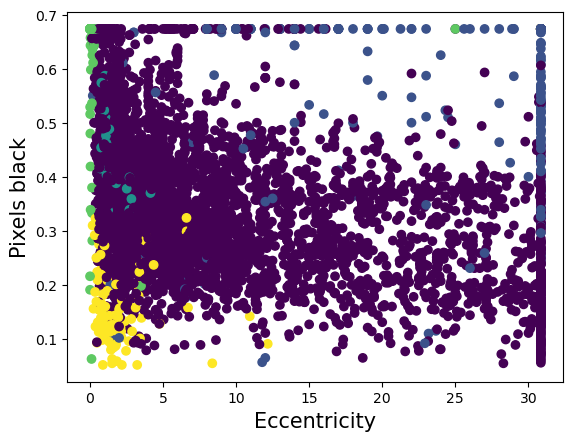

In [4]:
# 2D plot for 2 features from the dataset
import matplotlib.pyplot as plt
plt.scatter(df1['eccen'], df1['p_black'],c=y)
plt.xlabel('Eccentricity', fontsize=15)
plt.ylabel('Pixels black', fontsize=15);
plt.show()

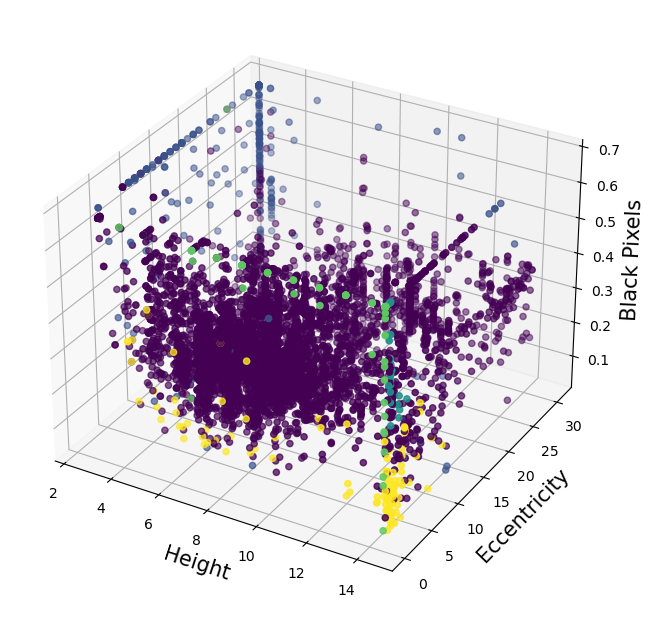

In [5]:
# 3D plot for 3 features from the dataset
from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(df1['height'], df1['eccen'], df1['p_black'], c=y)
ax.set_xlabel('Height', fontsize=15)
ax.set_ylabel('Eccentricity', fontsize=15)
ax.set_zlabel('Black Pixels', fontsize=15)
plt.show()

In [6]:
! pip install plotly

In [7]:
sc = StandardScaler()
X = sc.fit_transform(X)

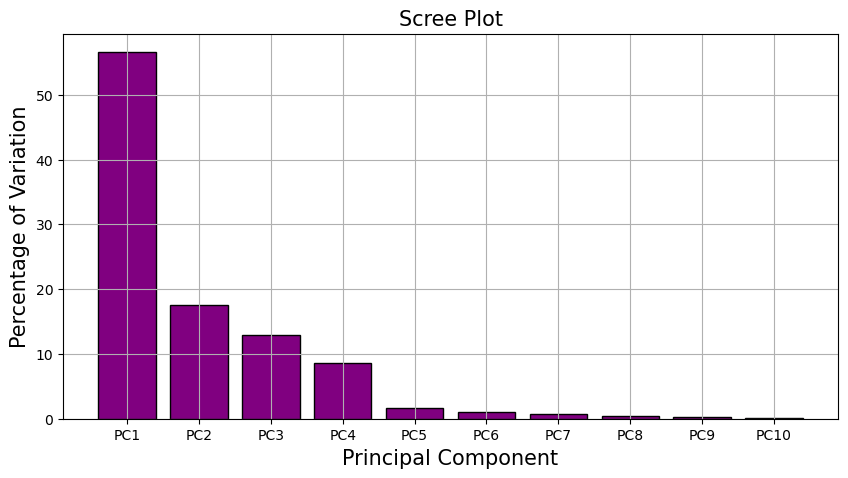

In [8]:
pca_data = PCA(n_components=10,random_state=0)
pca_data.fit(X)
per_var = np.round(pca_data.explained_variance_ratio_*100, 1)  

plt.figure(figsize = (10,5))

princ_comp = ["PC" + str(x) for x in range(1,11)]

plt.bar(x = range(1,11), height = per_var, tick_label = princ_comp,color='purple',edgecolor='black')
plt.xlabel("Principal Component", fontsize = 15)
plt.ylabel("Percentage of Variation", fontsize = 15)
plt.title("Scree Plot", fontsize = 15)
plt.grid();

In [9]:
import plotly.express as px
plt.figure(figsize = (12,10))

# implementing one dimensional reduction using PCA
pca_data = PCA(n_components=4,random_state=0)
pca_data.fit(X)
pca_trans=pca_data.transform(X)
labels = {
    str(i): f"PC {i+1} ({var:.2f}%)"
    for i, var in enumerate(pca_data.explained_variance_ratio_ * 100)}

fig = px.scatter_matrix(pca_trans,labels=labels,dimensions=range(4),color=3)
fig.update_traces(diagonal_visible=True)
fig.show()

<Figure size 1200x1000 with 0 Axes>

In [10]:
per_var = np.round(pca_data.explained_variance_ratio_*100, 1)    
print(per_var)

[56.6 17.5 12.9  8.6]


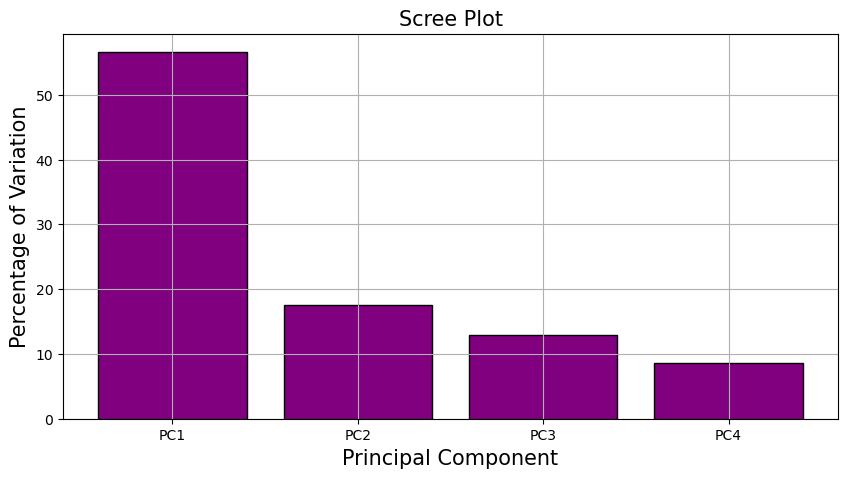

In [11]:
plt.figure(figsize = (10,5))

princ_comp = ["PC" + str(x) for x in range(1,5)]

plt.bar(x = range(1,5), height = per_var, tick_label = princ_comp,color='purple',edgecolor='black')
plt.xlabel("Principal Component", fontsize = 15)
plt.ylabel("Percentage of Variation", fontsize = 15)
plt.title("Scree Plot", fontsize = 15)
plt.grid();

In [12]:
pca_trans = pd.DataFrame(pca_trans, columns = princ_comp)
pca_trans

PC1       PC2       PC3       PC4
0    -2.156082 -0.540198 -0.026966  0.941246
1    -2.357428  0.645539  0.077391  0.273813
2    -1.826432  0.178160 -0.328387  1.289172
3    -2.229754  0.457802 -0.111817  1.280649
4    -2.601428  0.400875  0.391715 -0.524430
...        ...       ...       ...       ...
5468  3.128479  2.276914  2.146631  2.420452
5469 -2.659402  2.671059  0.002731  0.383647
5470  0.003533 -0.668908  1.322082 -0.494723
5471 -1.115015 -1.506537  0.069573 -0.180214
5472 -2.748362  2.816302 -0.112358 -0.024227

[5473 rows x 4 columns]

In [13]:
df_components = pd.DataFrame(pca_data.components_,columns=col)
df_components

height    length      area     eccen   p_black     p_and   mean_tr  \
0  0.215956  0.397659  0.413466  0.286626 -0.151589 -0.191485  0.004121   
1  0.131991  0.022851  0.040840 -0.009288  0.662769  0.270625  0.652457   
2 -0.677019  0.221234 -0.044300  0.570219  0.153527  0.343261 -0.150150   
3 -0.260184  0.086707 -0.032600  0.250958 -0.058591 -0.747697  0.462966   

   blackpix  blackand  wb_trans  
0  0.393671  0.409343  0.399900  
1  0.188451  0.078353 -0.021194  
2 -0.022167 -0.004864  0.033623  
3 -0.089512 -0.162271 -0.222663

Text(0, 0.5, 'Principal Component 2')

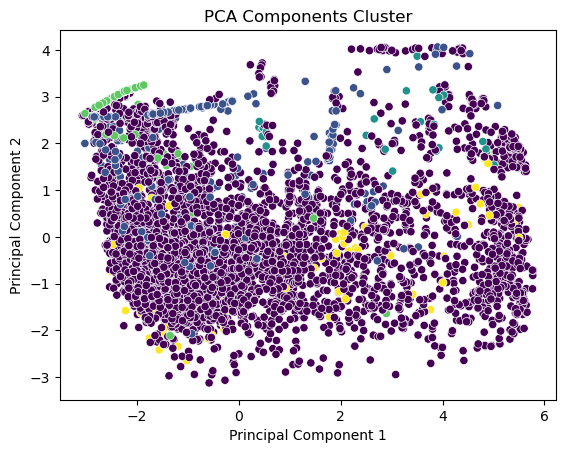

In [14]:
import seaborn as sns
sns.scatterplot(data = pca_trans, x=pca_trans.iloc[:,0], y=pca_trans.iloc[:,1],c=y)
plt.title('PCA Components Cluster')
# Set x-axis label
plt.xlabel('Principal Component 1')
# Set y-axis label
plt.ylabel('Principal Component 2')

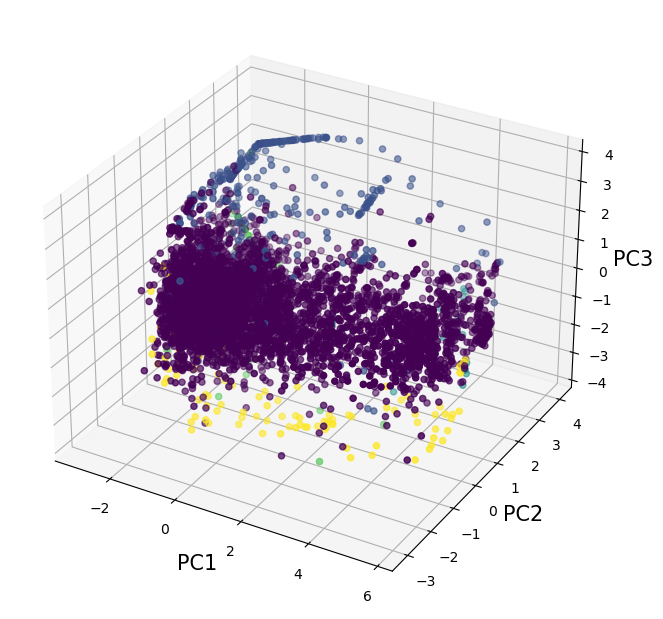

In [15]:
# 3 Component PCA

from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
ax.scatter(pca_trans.PC1, pca_trans.PC2,pca_trans.PC3, c=y)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_zlabel('PC3', fontsize=15)
plt.show()

In [16]:
# Non linear Dimensionality reduction using KernalPCA with kernal as rbf

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel ='rbf', gamma = 5)
X_kpca = kpca.fit_transform(df1)  

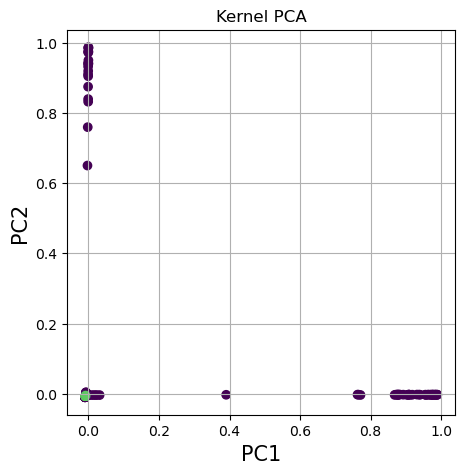

In [17]:
# 2 component Kernel PCA
plt.figure(figsize=(5,5))
plt.title("Kernel PCA")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1],c=y)
plt.xlabel("PC1", fontsize = 15)
plt.ylabel("PC2", fontsize = 15)
plt.grid();

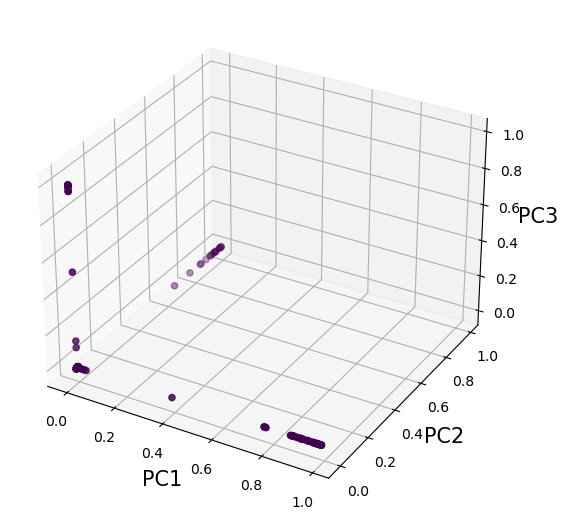

In [18]:
# 3 component Kernel PCA
fig= plt.figure(figsize=(5,5))
ax = Axes3D(fig)
ax.scatter(X_kpca[:, 0], X_kpca[:, 1], X_kpca[:, 2], c=y)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_zlabel('PC3', fontsize=15)
plt.show()